### Week 3 - Graph Visualization

__Project Overview:__

This week's assignment is to:

1. Load a graph database of your choosing from a text file or other source. If you take a
large network dataset from the web (such as from https://snap.stanford.edu/data/), please
feel free at this point to load just a small subset of the nodes and edges.
2. Create basic analysis on the graph, including the graph’s diameter, and at least one other
metric of your choosing. You may either code the functions by hand (to build your
intuition and insight), or use functions in an existing package.
3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
4. Please record a short video (~ 5 minutes), and submit a link to the video as part of your
homework submission. 

__Graph Theory Definitions Overview:__

__1. A node degree__ is number of connections that a node has.[1]

__2. Graph diameter__ is the largest number of edges that must be traversed in order to
travel from one node to another.[2]

__3. Eccentricity__ is the largest distance between a node and any other node.[3]

__4. Centrality__ identify the most important node within a graph.[4]

__5. Closeness Centrality__ is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.[5]

__6. Betweenness Centrality__ is a measure of centrality in a graph based on shortest paths. For every pair of nodes in a connected graph, there exists at least one shortest path between the nodes such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each node is the number of these shortest paths that pass through the node.[6]

__7. Eigenvector Centrality (also called eigencentrality)__ is a measure of the influence of a node in a network.[7]

[1] https://en.wikipedia.org/wiki/Degree_(graph_theory)

[2] http://mathworld.wolfram.com/GraphDiameter.html

[3] http://mathworld.wolfram.com/GraphEccentricity.html

[4] https://en.wikipedia.org/wiki/Centrality

[5] https://en.wikipedia.org/wiki/Closeness_centrality

[6] https://en.wikipedia.org/wiki/Betweenness_centrality

[7] https://en.wikipedia.org/wiki/Eigenvector_centrality




__Step 1.__ Loading a graph database of our choosing from a text file or other source.


First import necessary packages for plotting graphs using NetworkX and Matplotlib and set up graph size parameters...

In [221]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,12)

In [222]:
# Function copied from https://thispointer.com/python-how-to-sort-a-dictionary-by-key-or-value/.  
# Will be needed later on...
def sorted_dict(d):
    ms = sorted(d.items() , reverse=True, key=lambda x: x[1])
    return ms

Two .edges files were downloaded from *The Network Data Repository with Interactive Graph Analytics and Visualization* at [http://networkrepository.com](http://networkrepository.com).
      
Both are for mammal social networks.  The dolphins file is for a "social" network and the one for macaque monkeys is a "dominance" network.  

## Dolphins

<img src="images/dolphins.jpg" alt="Dolphins" width="900"/>

__Dolphins and Social Network__

Dolphins are highly social animals, often living in pods of up to a dozen individuals, though pod sizes and structures vary greatly between species and locations. In places with a high abundance of food, pods can merge temporarily, forming a superpod; such groupings may exceed 1,000 dolphins.[8]

[8] https://en.wikipedia.org/wiki/Dolphin

__Python Code__

The following code reads in "mammalia-dolphin-florida-social.edges" data...

In [223]:
dolphins = nx.read_edgelist('mammalia-dolphin-florida-social/mammalia-dolphin-florida-social.edges', nodetype=int, 
                                     data=(('weight',int),))

The following code draws the network using NetworkX.

__Disconnected Nodes 37 and 85__

Note that one line containing "37 85 1" was removed from the edges file beccause there were no edges between those two dolphins (numbers 37 and 85) and the rest of the graph.  They were far off on the side and it made the rest of the graph hard to visualize.

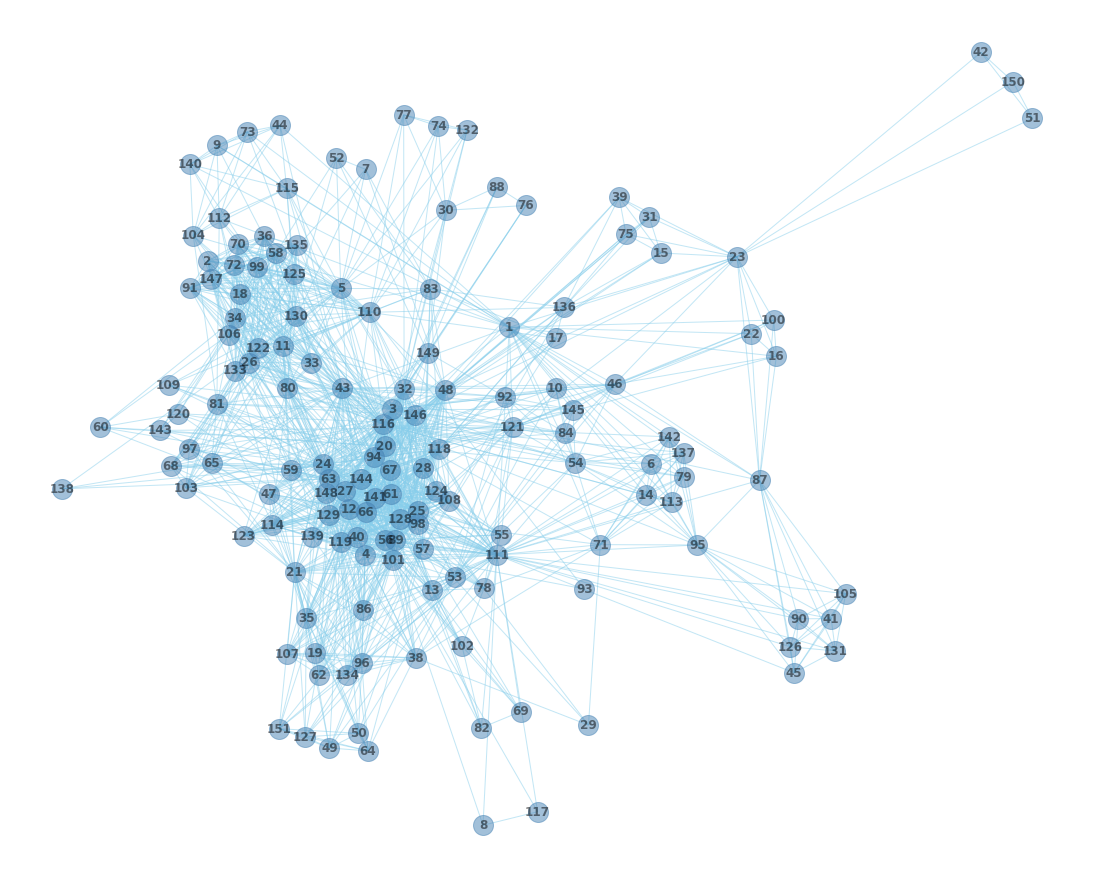

In [276]:
nx.draw(dolphins, with_labels=True, node_color="steelblue", node_size=400, font_weight='bold', 
        edge_color="skyblue", alpha=0.5)

The most interesting insight that immediately pops out from the graph is that there are 3 dolphins numbers 42, 51 and 150, that are only connected to the rest of the pod through one single other dolphin, number 23.  All 3 are connected to each other and to 23 but not to any other dolphin in the pod.  

Only one other dolphin seems to be even more isolated with less connections than 42, 51 and 150 who have 3 connections each.  Number 93 only has connections with 2 other dolphins in the pod total, numbers 57 and 110.  But those two are well connected to the rest of the pod.  

Two more dolphins, numbers 8 and 117 also have only 3 connections each, but unlike 42, 51 and 150 they each have connections to 2 other well-connected dolphins and each other.  

Remember there were also two dolphins, 37 and 85, who were deleted from the file because they had no connections to the rest of the pod at all.  Their only edge was one that connected the two of them to each other.  So those 2 are in fact the most isolated of the group.

All other dolphins in the pod have at least 4 connections but most have many more than that.  

This structure looks a lot like I would guess some human networks might look.  There are some outlier "loner" or "outcast" dolphins who have limited social connections compared to the majorty of their peers.  

### Metrics

#### Nodes Edges and Degree

In [280]:
print(nx.info(dolphins))

Name: 
Type: Graph
Number of nodes: 149
Number of edges: 1553
Average degree:  20.8456


149 dolphins with 1,553 connections. On average one dolphin has ~21 connection.

In [227]:
d = nx.degree(dolphins)

In [228]:
min(dict(d).values())

2

At least one not very social dolphin had only 2 connections.

In [229]:
max(dict(d).values())

69

At the same time we have at least one dolphin with 69 connections.

Text(0.5, 1.0, 'Distribution of Degrees in Dolphin Network')

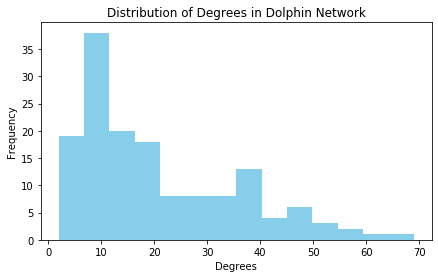

In [291]:
plt.figure(figsize=(7,4))
plt.hist(dict(d).values(), 14, color = "skyblue")
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Distribution of Degrees in Dolphin Network')

Our distribution is heavily left skewed. 

In [231]:
ds = sorted_dict(dict(d))
ds[0:10]

[(116, 69),
 (111, 62),
 (24, 59),
 (119, 59),
 (3, 54),
 (63, 54),
 (101, 50),
 (129, 49),
 (146, 48),
 (61, 48)]

In [2]:
ds[-1]

NameError: name 'ds' is not defined

#### Closeness Centrality

In [233]:
d_cc = nx.closeness_centrality(dolphins)

In [234]:
d_cc_s = sorted_dict(d_cc)
d_cc_s[1:10]

[(111, 0.6244725738396625),
 (24, 0.6090534979423868),
 (119, 0.6090534979423868),
 (3, 0.6040816326530613),
 (63, 0.6040816326530613),
 (146, 0.5967741935483871),
 (61, 0.5896414342629482),
 (101, 0.5873015873015873),
 (129, 0.5849802371541502)]

We can see that dolphins that have the most connections are also the closest to other dolphins (based on mathematical formula that calculates minimum number of edges needed to connect two nodes). 

In [235]:
d_cc_s[-1]

(51, 0.31223628691983124)

#### Betweenness Centrality

In [236]:
d_bc = nx.betweenness_centrality(dolphins)

In [237]:
d_bc_s = sorted_dict(d_bc)
d_bc_s[1:10]

[(116, 0.10660585436405577),
 (3, 0.060692540414938344),
 (43, 0.058793411707507494),
 (119, 0.05645899125681446),
 (23, 0.050878493844890536),
 (146, 0.04972310488868277),
 (48, 0.04710882989398321),
 (32, 0.03789480604036151),
 (24, 0.03705698783345232)]

Again, we see a lot of the same dolphins display high level of betweenness, or in another words the most connections between different dolphins pass through these 10 dolphins.

In [238]:
d_bc_s[-1]

(93, 0.0)

#### Eigenvector Centrality

In [239]:
d_ec = nx.eigenvector_centrality(dolphins)

In [240]:
d_ec_s = sorted_dict(d_ec)
d_ec_s[1:10]

[(24, 0.18686265791454115),
 (63, 0.18329374100634405),
 (119, 0.18150292300896842),
 (129, 0.1739888773410532),
 (101, 0.17203582804671796),
 (61, 0.17105178546891275),
 (56, 0.16895451104022574),
 (40, 0.1673073937313991),
 (111, 0.16710196658913679)]

Eigenvector calculations that help to identify the most influential members of network list many of the same dolphins.

In [241]:
d_ec_s[-1]

(51, 0.00043286176783971015)

#### 'Elite' Group

In [242]:
# Code adapted from Social Network Analysis for Startups chapter 3 page 54

## make a list of the elite group by merging top ten groups for 3 centrality metrics 
names1 = [x[0] for x in ds[:10]]
names2 = [x[0] for x in d_cc_s[:10]]
names3 = [x[0] for x in d_bc_s[:10]]

## use Python sets to compute a union of the sets 
names = list(set(names1) | set(names2) | set(names3))

## build a table with centralities 
data = [[name,d[name],d_cc[name],d_bc[name]] for name in names]
pd.DataFrame.from_records(data, columns=['Dolphin', 'Degree', 'Closeness', 'Betweenness'])

Dolphin  Degree  Closeness  Betweenness
0        32      43   0.562738     0.037895
1       129      49   0.584980     0.020889
2         3      54   0.604082     0.060693
3       101      50   0.587302     0.030207
4        43      47   0.564885     0.058793
5       111      62   0.624473     0.125630
6        48      42   0.573643     0.047109
7       146      48   0.596774     0.049723
8       116      69   0.643478     0.106606
9        23      17   0.449848     0.050878
10      119      59   0.609053     0.056459
11       24      59   0.609053     0.037057
12       61      48   0.589641     0.020859
13       63      54   0.604082     0.022289

In [283]:
# Code adapted from Social Network Analysis for Startups chapter 3 page 54

## make a list of the elite group by merging top ten groups for 3 centrality metrics 
names1 = [x[0] for x in ds[:10]]
names2 = [x[0] for x in d_cc_s[:10]]
names3 = [x[0] for x in d_bc_s[:10]]
names4 = [x[0] for x in d_ec_s[:10]]

## use Python sets to compute a union of the sets 
names = list(set(names4) - (set(names1) | set(names2) | set(names3)))

## build a table with centralities 
data = [[name,d[name],d_cc[name],d_bc[name],d_ec[name]] for name in names]
pd.DataFrame.from_records(data, columns=['Dolphin', 'Degree', 'Closeness', 'Betweenness', 'Eigenvector'])

Dolphin  Degree  Closeness  Betweenness  Eigenvector
0       40      44   0.564885     0.007760     0.167307
1       56      47   0.578125     0.012737     0.168955

There are two dolphins (numbers 40 and 56) in the top 10 eigenvector centrality list that are not in the combined top ten lists for the other 3 centrality measures.  These are the so called "Gray Cardinals" who while not so well-connected themselves are connected to others who are well-connected.  

From our analysis, we see the incredible value that mathematics brings to biology in helping us to identify leader of dolphin network. We can see that dolphins vary in their sociability widely.The intereting thing to see would be if gender, age, or size influences social position in a network.

#### Radius and Diameter

In [244]:
nx.radius(dolphins)

2

We have at least one dolphin that is connected to all other dolphins by maximum traveling through 2 edges. It seems incredible to me that this dolphin is so super social.

In [245]:
nx.diameter(dolphins)

4

The dolphin that very likely is the most socialy isolated still has to travel at most through 4 edges to be able to reach all other dolphins. It is still not such a remote connection. In another words, dolphins appear to live in a very tight knit community. 

#### Eccentricity

In [246]:
min(nx.eccentricity(dolphins))

1

In [247]:
max(nx.eccentricity(dolphins))

151

In [248]:
dolphin_ecc = pd.DataFrame((nx.eccentricity(dolphins).values()))[0].value_counts().sort_index()
dolphin_ecc

2     1
3    87
4    61
Name: 0, dtype: int64

Text(0, 0.5, 'Frequency')

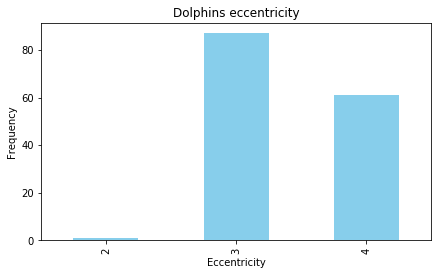

In [290]:
plot = dolphin_ecc.plot(kind='bar',
                        color = "skyblue",
                        figsize=(7,4),
                        title="Dolphins eccentricity")
plot.set_xlabel("Eccentricity")
plot.set_ylabel("Frequency")

## Macaques

![Macaques](images/macaques.jpg)

__Macaques and Social Network__

Rhesus macaques live in large, multi-male/multi-female groups that have an average of 10 to 80 individuals, regardless of habitat type. Groups may number in the hundreds in mountainous areas and areas of high human food subsidization or agricultural habitats[9]

[9] http://pin.primate.wisc.edu/factsheets/entry/rhesus_macaque/behav

__Python Code__

The following code reads in the "mammalia-macaque-dominance.edges" data file...

In [250]:
macaques = nx.read_edgelist('mammalia-macaque-dominance/mammalia-macaque-dominance.edges', nodetype=int, 
                                     data=(('weight',int),))

The following code draws the network using NetworkX...

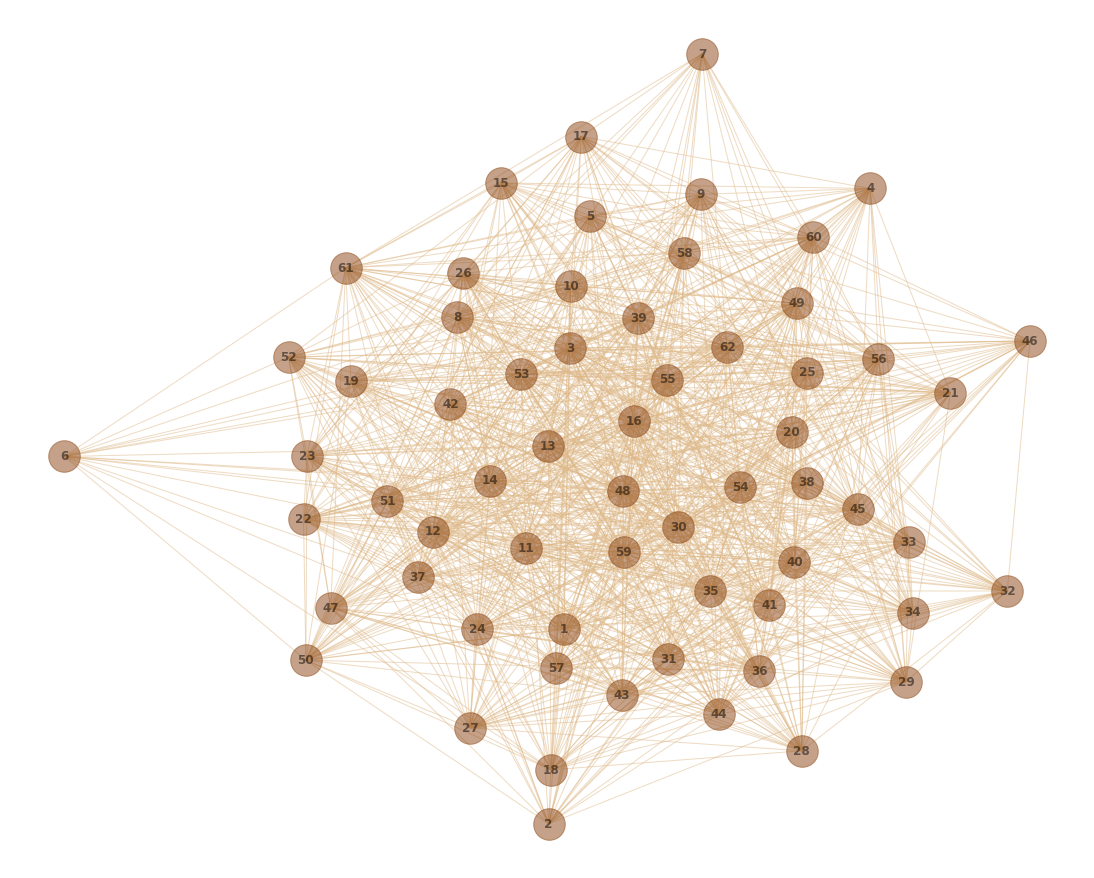

In [251]:
nx.draw(macaques, with_labels=True, node_color="saddlebrown", node_size=1000, font_weight='bold', 
        edge_color="burlywood", alpha=0.5)

Just on visual inspection alone, we can see that the macaque dominance network is strikingly different from the dolphin network visualized above.  All members of the group are well connected with at least a dozen edges connecting them to the rest of the group.  There seems to be much less variance in the number of connections each individual has in this network vs. a very wide variance in the dolphin network.  

### Metrics

#### Nodes Edges and Degree

In [281]:
print(nx.info(macaques))

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 1167
Average degree:  37.6452


We have 62 monkey in the network with 1,167 connections. On average, a monkey had ~38 connections.

In [253]:
m = nx.degree(macaques)

In [254]:
min(dict(m).values())

17

The least connected macaques had 17 connections.

In [255]:
max(dict(m).values())

55

In [3]:
While the best connected macaques had 55.

SyntaxError: invalid syntax (<ipython-input-3-78ce6c3223d6>, line 1)

In [4]:
plt.figure(figsize=(7,4))
plt.hist(dict(m).values(), 14, color = "burlywood")
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Distribution of Degrees in Macaque Network')

NameError: name 'plt' is not defined

In [257]:
ms = sorted_dict(dict(m))
ms[0:10]

[(48, 55),
 (30, 53),
 (59, 51),
 (12, 49),
 (16, 47),
 (40, 47),
 (13, 46),
 (14, 46),
 (41, 46),
 (35, 45)]

In [258]:
ms[-1]

(6, 17)

#### Closeness Centrality

In [259]:
m_cc = nx.closeness_centrality(macaques)

In [260]:
m_cc_s = sorted_dict(m_cc)
m_cc_s[1:10]

[(30, 0.8840579710144928),
 (59, 0.8591549295774648),
 (12, 0.8356164383561644),
 (16, 0.8133333333333334),
 (40, 0.8133333333333334),
 (13, 0.8026315789473685),
 (14, 0.8026315789473685),
 (41, 0.8026315789473685),
 (35, 0.7922077922077922)]

In [261]:
m_cc_s[-1]

(6, 0.580952380952381)

#### Closeness Centrality

In [262]:
m_bc = nx.betweenness_centrality(macaques)

In [263]:
m_bc_s = sorted_dict(m_bc)
m_bc_s[1:10]

[(30, 0.013915476508492107),
 (59, 0.012580824960580403),
 (12, 0.011912288814093008),
 (55, 0.0112336308200591),
 (13, 0.010682548449676756),
 (40, 0.010509721793316322),
 (14, 0.010394299661348525),
 (62, 0.009869243029725503),
 (16, 0.009360671601008634)]

In [264]:
m_bc_s[-1]

(6, 0.0009558694271049144)

#### Eigenvector Centrality

In [265]:
m_ec = nx.eigenvector_centrality(macaques)

In [266]:
m_ec_s = sorted_dict(m_ec)
m_ec_s[1:10]

[(30, 0.1723499397325954),
 (59, 0.16590423942672292),
 (12, 0.15883070770487354),
 (16, 0.1552777653254267),
 (41, 0.15457065874528633),
 (40, 0.15327774230232388),
 (35, 0.1519355480936074),
 (13, 0.149788559723127),
 (14, 0.14952984880127926)]

In [267]:
m_ec_s[-1]

(6, 0.059040672085233906)

#### 'Elite' Group

In [268]:
# Code adapted from Social Network Analysis for Startups chapter 3 page 54

## make a list of the elite group by merging top ten groups for 3 centrality metrics 
names1 = [x[0] for x in ms[:10]]
names2 = [x[0] for x in m_cc_s[:10]]
names3 = [x[0] for x in m_bc_s[:10]]

## use Python sets to compute a union of the sets 
names = list(set(names1) | set(names2) | set(names3))

## build a table with centralities 
data = [[name,m[name],m_cc[name],m_bc[name]] for name in names]
pd.DataFrame.from_records(data, columns=['Macaque Monkey', 'Degree', 'Closeness', 'Betweenness'])

Macaque Monkey  Degree  Closeness  Betweenness
0               35      45   0.792208     0.007414
1               40      47   0.813333     0.010510
2               41      46   0.802632     0.008016
3               12      49   0.835616     0.011912
4               13      46   0.802632     0.010683
5               14      46   0.802632     0.010394
6               48      55   0.910448     0.016568
7               16      47   0.813333     0.009361
8               55      45   0.792208     0.011234
9               62      44   0.782051     0.009869
10              59      51   0.859155     0.012581
11              30      53   0.884058     0.013915

In [284]:
# Code adapted from Social Network Analysis for Startups chapter 3 page 54

## make a list of the elite group by merging top ten groups for 3 centrality metrics 
names1 = [x[0] for x in ms[:10]]
names2 = [x[0] for x in m_cc_s[:10]]
names3 = [x[0] for x in m_bc_s[:10]]
names4 = [x[0] for x in m_ec_s[:10]]

## use Python sets to compute a union of the sets 
names = list(set(names4) - (set(names1) | set(names2) | set(names3)))

## build a table with centralities 
data = [[name,m[name],m_cc[name],m_bc[name],m_ec[name]] for name in names]
pd.DataFrame.from_records(data, columns=['Macaque Monkey', 'Degree', 'Closeness', 'Betweenness', 'Eigenvector'])

Empty DataFrame
Columns: [Macaque Monkey, Degree, Closeness, Betweenness, Eigenvector]
Index: []

There are no macaque monkeys in the top 10 eigenvector centrality list that are not in the combined top ten lists for the other 3 centrality measures. 

#### Radius and Diameter

In [270]:
nx.radius(macaques)

2

In [271]:
nx.diameter(macaques)

2

It is interesting that radius and diameter are the same for macaques. It would indicate much more uniform social connectivity as well as extreme importance of social connections for macaques.

#### Eccentricity

In [272]:
min(nx.eccentricity(macaques))

1

In [273]:
max(nx.eccentricity(macaques))

62

In [274]:
macaque_counts = pd.DataFrame((nx.eccentricity(macaques).values()))[0].value_counts().sort_index()
macaque_counts

2    62
Name: 0, dtype: int64

Text(0, 0.5, 'Frequency')

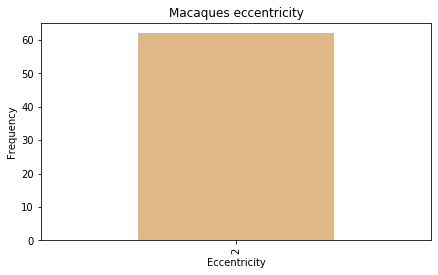

In [288]:
plot = macaque_counts.plot(kind='bar', 
                           color = "burlywood",
                           figsize=(7,4),
                           title="Macaques eccentricity")
plot.set_xlabel("Eccentricity")
plot.set_ylabel("Frequency")

__Dolphin and Macaques Social Networks: Simularities and Differences.__

__1. Network Size__ 149 for dolphins and 62 for macaques. Dolphins' social groups are bigger than macaques, which would mean that they are harder to maintain and they are more likely to be less connected. ALso, interstingly macaques did not have disconnected members, while dolphins had 2 members that were disconnected from the main network.

__2. Average Number of Connections__ 21 for dolphins and 38 for macaques. Dolphins generally do not have as many connections as macaques. I do not necessary see it as a bad thing. It is hard to have quality relationships when you interact with 38 individuals on a regular basis. So, it might become matter of quality vs quanity.

__3. Minimum/maximum Number of Connections.__ There is at least one dolphin that had only 2 connections, while the very minimum macaques had was 18. I would interpret it as dolphins being more independent and being able to survive on their own, while macaques cannot live outside of big group. The maximum connections, a dolphin had was 69 or almost half of the network, while a monkey had 55 connections or almost every single member of the group! 

__4. Distribution of Degrees.__ Dolphins' distribution is heavily left skewed, while macaques' distribution is normally distributed. We can say that most dolphins do not have that many connections, while there are a few that are extremly well connected. For monkey's it is more balanced, we have some with relatevily few connections and some with really a lot, but most are in a middle. 

__5. Closeness Centrality.__ Dolphins are not that closely centered as macaques, which confirms are prior findingd.

__6. Betweenness Centrality.__ Between dolphins and macaques are similar with macaques being slightly higher, are we can say that they are simularly centralized, with macaques maybe being a litlle bit more.

__7. Eigenvector Centrality.__ The highest values are simular for both dolphins and macaques, which would mean that leaders play simular roles in both groups. However, a lowest value for dolphins is almost 0, which means that this member is practically has no importance for the dolphin network. While no macaques has value close to zero. It means that all monkeys play at least some role in group. 

__8. Radius/Diameter.__ Radius is the same for both groups - 2. So both groups have highly connected individuals. However, radius is smaller for macaques - 2 vs 4 for dolphins. Which means that monkeys are much tighter group and much more uniformly connected.

__9. In conclusion.__ All indicators show that social interactions are more critical for macaques. No macaques can exist outside of network. While dolphins' network allows for bigger variability, with some members being extremly social and others are not.


### References

Ryan A. Rossi, Nesreen K. Ahmed, and others. (2015). The Network Data Repository with Interactive Graph Analytics and Visualization. Retrieved from http://networkrepository.com